## 목차
- autograd란
- autograd model에 적용하기
- autograd on/off 하기
- autograd profiler 출력

## Autograd🧐
 - pytorch의 autograd 기능은 모델링을 빠르고 수월하게 만들어줍니다. 모델 학습시 **자동으로 역전파(backpropagation)을 실행**하서 학습 파라미터별로 미분값을 계산해줍니다.
 - runtime에서 매번의 tensor output마다 계산을 추적해줌으로서 계산을 빠르게 해주면서 기록을 남깁니다.

> 아래의 예시를 통하여 이해해 봅시다.

In [22]:
%matplotlib inline

In [23]:
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [24]:
a = torch.linspace(0., 2.*math.pi, steps=25, requires_grad=True) # gradient 연산을 필요로 한다는 것을 알려줌
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


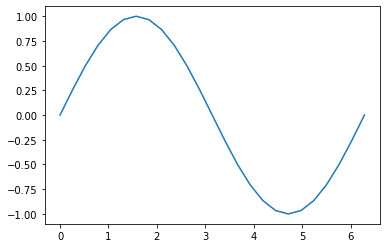

In [25]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

> b를 출력해서 확인해 보면 gradient를 요하는 것이라고 할 수 있다. 

In [26]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


> 연산이 진행이 완료된 c, d도 모두 gradient 계산이 진행된 것이라는 걸 알 수 있다.

In [27]:
c= 2*b
d= c+1
out=d.sum()
c,d,out

(tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
          1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
          1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
         -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
         -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
        grad_fn=<MulBackward0>),
 tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
          2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
          2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
         -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
         -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
        grad_fn=<AddBackward0>),
 tensor(25., grad_fn=<SumBackward0>))

`grad_fn`: 이전의 tensor정보 및 input 정보를 `next_functions` 로 확인 가능함

[참고자료(medium)](https://amsword.medium.com/understanding-pytorchs-autograd-with-grad-fn-and-next-functions-b2c4836daa00)

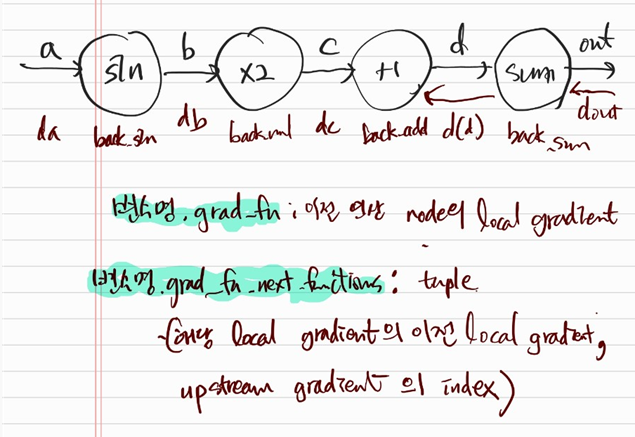

In [28]:
print(out.grad_fn.next_functions,d.grad_fn.next_functions,c.grad_fn.next_functions, b.grad_fn.next_functions)
print(out.grad_fn,d.grad_fn, c.grad_fn, b.grad_fn, a.grad_fn)

((<AddBackward0 object at 0x7febedcd9f90>, 0),) ((<MulBackward0 object at 0x7febedcd97d0>, 0), (None, 0)) ((<SinBackward0 object at 0x7febedcd9c90>, 0), (None, 0)) ((<AccumulateGrad object at 0x7febedcd9d50>, 0),)
<SumBackward0 object at 0x7febedcd9110> <AddBackward0 object at 0x7febedcd9c90> <MulBackward0 object at 0x7febedcd9d50> <SinBackward0 object at 0x7febedcd9990> None


> backpropagation을 해볼까?

In [29]:
out.backward() # backprop 진행
a.grad

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])

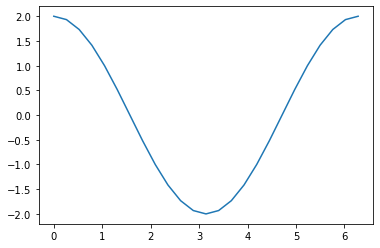

In [30]:
plt.plot(a.detach(), a.grad.detach())

함수는 결국 `sum(2 * sin(x)+1)` 이다. 미분하면 `2cosx`가 된다. 그 그래프인 것.

## 모델에 적용하기 😎
> 이제 autograd를 training 과정에서 어떻게 활용하는지 살펴보자.

In [31]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()
        
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

> torch.nn.module을 활용할 때,다시말해 pytorch layer에 input과 output을 특정할 때 `requires_grad`=False로 설정함에 유념하자. 이미 모듈에서 가정이 되어있기 때문에 True로 특정하지 않는다.  

weight 값이 있고 gradient값은 없다.(update안했으니까)

In [32]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([ 0.0910, -0.0464, -0.0605, -0.0684, -0.0656,  0.0875, -0.0268,  0.0975,
         0.0228, -0.0211], grad_fn=<SliceBackward0>)
None


> optimizer : sgd

> loss : euclidean distance

In [35]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(181.9445, grad_fn=<SumBackward0>)


> backpropagation!
- weight 값은 그대로고, gradient 값이 생성되었다.(아직 update는 안되었음)

In [36]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0910, -0.0464, -0.0605, -0.0684, -0.0656,  0.0875, -0.0268,  0.0975,
         0.0228, -0.0211], grad_fn=<SliceBackward0>)
tensor([-5.5759, -0.6022,  1.9601, -3.0873,  4.5493, -0.6871, -3.2452, -3.0258,
         1.2102,  0.4767])


> `step()` 으로 parameter를 update하였다. (gradient값에 의해)

In [37]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0966, -0.0458, -0.0625, -0.0653, -0.0701,  0.0882, -0.0235,  0.1005,
         0.0216, -0.0215], grad_fn=<SliceBackward0>)
tensor([-5.5759, -0.6022,  1.9601, -3.0873,  4.5493, -0.6871, -3.2452, -3.0258,
         1.2102,  0.4767])


> `zero.grad()`: `step()` 이후에 반드시 해줘야 하는 작업. 
아니면 gradient가 누적해서 쌓이게 된다(우리가 원하는 결과를 얻을 수 없음).

아래 두번쨰 출력값에서 zero_grad를 안해줘서 값이 매우 커진 것을 알 수 있다.

In [38]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()
    
print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad() # 필수적인 과정

print(model.layer2.weight.grad[0][0:10])

tensor([-5.5759, -0.6022,  1.9601, -3.0873,  4.5493, -0.6871, -3.2452, -3.0258,
         1.2102,  0.4767])
tensor([-47.6748,   3.3986,   9.4171, -13.5132,  22.2498,  -9.6247, -24.1158,
        -17.5890,   4.4297,   9.3880])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## Autograd on/off하는 방법💡

1. [value].`requires_grad` = False 로 설정하면 됨.

In [39]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


2. `with torch.no_grad()` 이용

In [40]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


3. `@torch.no_grad()` decorator 함수에 적용해서 이용하기

In [41]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


- `torch.enable_grad()`: autograd 꺼져있을 때 켜주는 작업
- `detach` : Returns a new Tensor, detached from the current graph.


In [42]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.8554, 0.1132, 0.1491, 0.9342, 0.0373], requires_grad=True)
tensor([0.8554, 0.1132, 0.1491, 0.9342, 0.0373])


`in_place operation`(changing Tensor directly without making a copy)하지 말것.

In [43]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

RuntimeError: ignored

### Autograd Profiler🤡
- 계산 기록 및 시간 정보를 알 수 있는 profiler : `torch.autograd.profiler.profile(use_cuda=run_on_gpu)`

In [44]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True
    
x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y
        
print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        52.47%       3.988ms        52.47%       3.988ms       3.988us          1000  
    aten::mul        47.53%       3.612ms        47.53%       3.612ms       3.612us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 7.600ms

